La viscosidad cinética $\mu_k$ del agua varía con la temperatura $T$ de la siguiente manera:

| T (°C) | μk (10⁻³ m²/s) |
|--------|----------------|
|   0    |    0.101        |
|  21.1  |    1.79         |
|  37.8  |    1.13         |
|  54.4  |    0.696        |
|  71.1  |    0.519        |
|  87.8  |    0.338        |
|  100   |    0.296        |

Utilice el método de su preferencia para interpolar $\mu_k$ en $T = 10^\circ, 30^\circ, 60^\circ$ y $90^\circ C$

Número de puntos originales: 7

Introduce los valores de x y y:
Valor de x1: 0
Valor de y1: 0.101
Valor de x2: 21.1
Valor de y2: 1.79
Valor de x3: 37.8
Valor de y3: 1.13
Valor de x4: 54.4
Valor de y4: 0.696
Valor de x5: 71.1
Valor de y5: 0.519
Valor de x6: 87.8
Valor de y6: 0.338
Valor de x7: 100
Valor de y7: 0.296

Tabla de valores ingresados:
 x       y
----------------
0.00   0.10
21.10   1.79
37.80   1.13
54.40   0.70
71.10   0.52
87.80   0.34
100.00   0.30

Número de valores a interpolar: 4

Introduce los valores de x para interpolar:
Valor de x1 a interpolar: 10
Valor de x2 a interpolar: 30
Valor de x3 a interpolar: 60
Valor de x4 a interpolar: 90

Resultados de la interpolación:
For x = 10.0, y = 1.7
For x = 30.0, y = 1.5
For x = 60.0, y = 0.6
For x = 90.0, y = 0.3


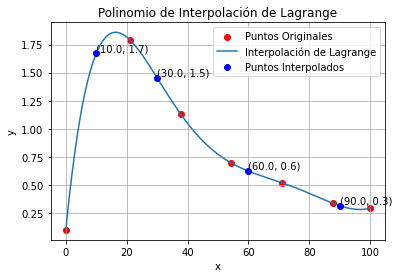

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


def lagrange_1(x_points, y_points, xp_values):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp_values (list or array): Puntos a interpolar.

    Retorna:
    yp_values (list): Lista de valores interpolados para cada xp.
    """
    m = len(x_points)
    x = sp.symbols("x")

    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular valores interpolados para cada punto solicitado
    yp_values = [lagrange_interpolation(xp, x_points, y_points) for xp in xp_values]

    # Mostrar resultados de interpolación
    print("\nResultados de la interpolación:")
    for i, xp in enumerate(xp_values):
        print(f"For x = {xp:.1f}, y = {yp_values[i]:.1f}")

    # Crear puntos para graficar el polinomio
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar polinomio de interpolación
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar puntos interpolados
    plt.scatter(xp_values, yp_values, color="blue", zorder=5, label="Puntos Interpolados")
    for i, xp in enumerate(xp_values):
        plt.text(
            xp,
            yp_values[i],
            f"({xp:.1f}, {yp_values[i]:.1f})",
            fontsize=10,
            verticalalignment="bottom",
        )

    # Etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Construcción del polinomio simbólico
"""
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    polinomio_simplificado = sp.simplify(polinomio)
    print("\nPolinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp_values
"""

try:
    n = int(input("Número de puntos originales: "))
    x_points = []
    y_points = []

    print("\nIntroduce los valores de x y y:")
    for i in range(n):
        x_val = float(input(f"Valor de x{i + 1}: "))
        y_val = float(input(f"Valor de y{i + 1}: "))
        x_points.append(x_val)
        y_points.append(y_val)
        
    print("\nTabla de valores ingresados:")
    print(" x       y")
    print("----------------")
    for i in range(n):
        print(f"{x_points[i]:.2f}   {y_points[i]:.2f}")


    m = int(input("\nNúmero de valores a interpolar: "))
    xp_values = []
    print("\nIntroduce los valores de x para interpolar:")
    for i in range(m):
        xp_val = float(input(f"Valor de x{i + 1} a interpolar: "))
        xp_values.append(xp_val)

    lagrange_1(x_points, y_points, xp_values)

except ValueError:
    print("Por favor, inserta un número válido.")


La tabla muestra cómo la densidad relativa $\rho$ del aire varía con la altura $h$. Determine mediante interpolación de Lagrange la densidad relativa del aire a 10.5 km.

| $h$ (km) | $\rho$       |
|--------------|-----------------|
|      0       |      1.0000      |
|    1.525     |      0.8617      |
|    3.050     |      0.7385      |
|    4.575     |      0.6292      |
|    6.10      |      0.5328      |
|    7.625     |      0.4481      |
|    9.150     |      0.3741      |


Número de puntos originales: 7

Introduce los valores de x y y:
Valor de x1: 0
Valor de y1: 1
Valor de x2: 1.525
Valor de y2: 0.8617
Valor de x3: 3.050
Valor de y3: 0.7385
Valor de x4: 4.575
Valor de y4: 0.6292
Valor de x5: 6.10
Valor de y5: 0.5328
Valor de x6: 7.625
Valor de y6: 0.4481
Valor de x7: 9.150
Valor de y7: 0.3741

Tabla de valores ingresados:
 x       y
----------------
0.00   1.00
1.52   0.86
3.05   0.74
4.58   0.63
6.10   0.53
7.62   0.45
9.15   0.37

Número de valores a interpolar: 1

Introduce los valores de x para interpolar:
Valor de x1 a interpolar: 10.5

Resultados de la interpolación:
For x = 10.5, y = 0.3


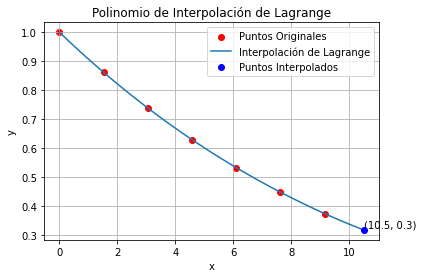

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


def lagrange_1(x_points, y_points, xp_values):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp_values (list or array): Puntos a interpolar.

    Retorna:
    yp_values (list): Lista de valores interpolados para cada xp.
    """
    m = len(x_points)
    x = sp.symbols("x")

    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular valores interpolados para cada punto solicitado
    yp_values = [lagrange_interpolation(xp, x_points, y_points) for xp in xp_values]

    # Mostrar resultados de interpolación
    print("\nResultados de la interpolación:")
    for i, xp in enumerate(xp_values):
        print(f"For x = {xp:.1f}, y = {yp_values[i]:.1f}")

    # Crear puntos para graficar el polinomio
    # Extender el rango para incluir puntos fuera del dominio original
    x_interpolado = np.linspace(min(min(x_points), min(xp_values)), max(max(x_points), max(xp_values)), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar polinomio de interpolación
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar puntos interpolados
    plt.scatter(xp_values, yp_values, color="blue", zorder=5, label="Puntos Interpolados")
    for i, xp in enumerate(xp_values):
        plt.text(
            xp,
            yp_values[i],
            f"({xp:.1f}, {yp_values[i]:.1f})",
            fontsize=10,
            verticalalignment="bottom",
        )

    # Etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Construcción del polinomio simbólico
"""
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    polinomio_simplificado = sp.simplify(polinomio)
    print("\nPolinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp_values
"""

try:
    n = int(input("Número de puntos originales: "))
    x_points = []
    y_points = []

    print("\nIntroduce los valores de x y y:")
    for i in range(n):
        x_val = float(input(f"Valor de x{i + 1}: "))
        y_val = float(input(f"Valor de y{i + 1}: "))
        x_points.append(x_val)
        y_points.append(y_val)
        
    print("\nTabla de valores ingresados:")
    print(" x       y")
    print("----------------")
    for i in range(n):
        print(f"{x_points[i]:.2f}   {y_points[i]:.2f}")


    m = int(input("\nNúmero de valores a interpolar: "))
    xp_values = []
    print("\nIntroduce los valores de x para interpolar:")
    for i in range(m):
        xp_val = float(input(f"Valor de x{i + 1} a interpolar: "))
        xp_values.append(xp_val)
    lagrange_1(x_points, y_points, xp_values)

except ValueError:
    print("Por favor, inserta un número válido.")

La amplitud vibracional de un eje de transmisión es medida a varias velocidades. Los resultados son:

| Velocidad (rpm) | Amplitud (mm) |
|----------------|----------------|
|       0        |       0        |
|      400       |     0.072      |
|      800       |     0.223      |
|     1200       |     0.712      |
|     1600       |     3.400      |

Utilice el método de interpolación más conveniente para graficar amplitud vs velocidad de 0 a 2500 rpm (observe los intervalos de la tabla y determine el tamaño más conveniente de los intervalos).

Ingrese el número de datos: 5

Introduce los datos:
Valor de x1: 0
Valor de y1: 0
Valor de x2: 400
Valor de y2: 0.072
Valor de x3: 800
Valor de y3: 0.233
Valor de x4: 1200
Valor de y4: 0.712
Valor de x5: 1600
Valor de y5: 3.400

Ingrese el valor inicial del rango de interpolación: 0
Ingrese el valor final del rango de interpolación: 2500
Ingrese el incremento entre puntos: 125
Ingresa el titulo de la graficaAmplitud(mm) vs Velocidad(rpm)


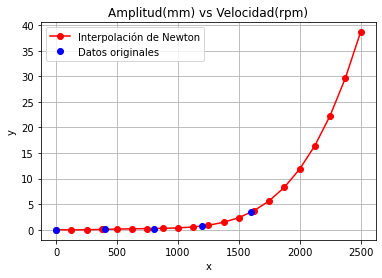

  x       yInterpolado
-----------------------
 0.0    0.0000
 125.0    -0.0407
 250.0    -0.0061
 375.0    0.0584
 500.0    0.1234
 625.0    0.1752
 750.0    0.2162
 875.0    0.2643
 1000.0    0.3535
 1125.0    0.5336
 1250.0    0.8703
 1375.0    1.4450
 1500.0    2.3550
 1625.0    3.7136
 1750.0    5.6497
 1875.0    8.3082
 2000.0    11.8500
 2125.0    16.4515
 2250.0    22.3052
 2375.0    29.6195
 2500.0    38.6183


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def coeffts(xData, yData):
    m = len(xData)  # Número de datos
    a = yData.copy()
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (xData[k:m] - xData[k - 1])
    return a

def evalPoly(a, xData, x):
    n = len(xData) - 1  # Grado del polinomio
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - xData[n - k]) * p
    return p


n = int(input("Ingrese el número de datos: "))

xData = np.zeros(n)
yData = np.zeros(n)

print("\nIntroduce los datos:")
for i in range(n):
    xData[i] = float(input(f"Valor de x{i + 1}: "))
    yData[i] = float(input(f"Valor de y{i + 1}: "))

coeff = coeffts(xData, yData)

inicio = float(input("\nIngrese el valor inicial del rango de interpolación: "))
fin = float(input("Ingrese el valor final del rango de interpolación: "))
aumento = float(input("Ingrese el incremento entre puntos: "))

x = np.arange(inicio, fin + aumento, aumento)
yInterp = evalPoly(coeff, xData, x)


plt.plot(x, yInterp, "r-o", label="Interpolación de Newton") 
plt.plot(xData, yData, "bo", label="Datos originales")  
plt.legend()
plt.grid()
plt.title(input("Ingresa el titulo de la grafica"))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("  x       yInterpolado")
print("-----------------------")
for i in range(len(x)):
    y = yInterp[i]
    print(" %.1f    %.4f" % (x[i], y))
